Dataset columns:
 Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')
First few rows of the dataset:
    Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1           None               5             No       No      No   
2          Heavy               3        

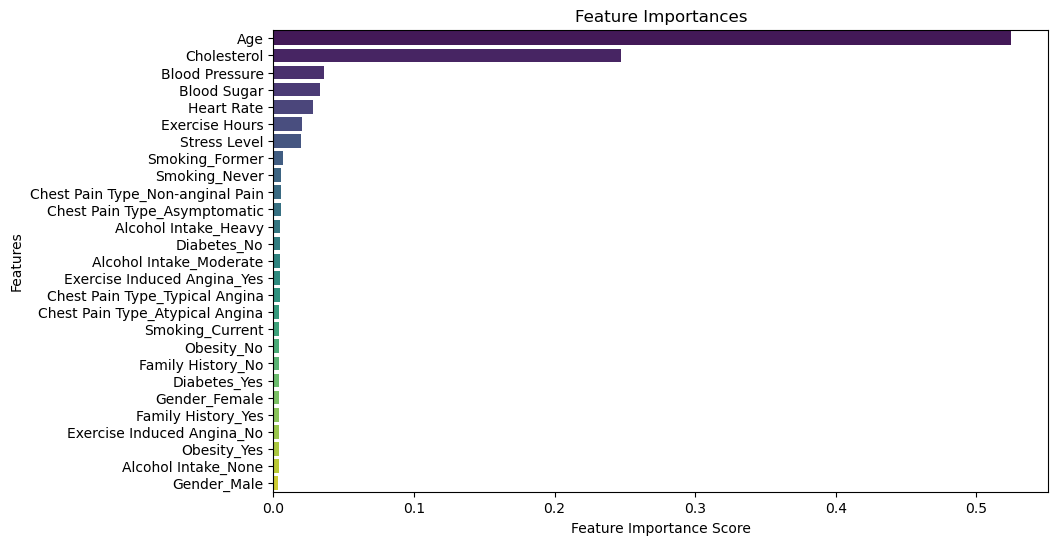

Predictions with probabilities saved to: C:\Users\Smita\Downloads\heart_disease_with_probabilities.csv


C:\Users\Smita\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\Smita\Downloads\heartdiseasedataset\heart_disease_dataset.csv"
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset columns:\n", df.columns)
print("First few rows of the dataset:\n", df.head())

# Identify the target column (assumed to be 'Heart Disease')
target_column = 'Heart Disease'

if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in DataFrame columns.")

# Separate features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# One-Hot Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature importance analysis
feature_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Predicting the likelihood of heart disease (probability scores)
df['Heart Disease Probability'] = rf_model.predict_proba(X_encoded)[:, 1]

# Save the results with probabilities
output_file_path = r"C:\Users\Smita\Downloads\heart_disease_with_probabilities.csv"
df.to_csv(output_file_path, index=False)
print("Predictions with probabilities saved to:", output_file_path)
